# **Notebook Overview:-**
* Applying data represntions techniques on a woman E-commerce wbsite for fashion and clothes.
* Get strating with text preprocessing using NLTK 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
print('Setup completed!!')

Setup completed!!


# **Discovering of the 10 first rows of the DataFrame:-🕵**

In [2]:
data = pd.read_csv('../input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')
data.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


# **Check the Features(columns)types (int, float , obj or bool) ??:-**

In [3]:
data.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

# **Dropout Unwanted Features (Would not make sense at all ;)🚮**

In [4]:
data.drop(['Unnamed: 0','Clothing ID'], axis=1, inplace=True)

# **Rename the columns names and make them more pythnic :)🐍**

In [5]:
data.rename(columns={'Review Text': 'text',
                    'Positive Feedback Count': 'feedback_count',
                    'Division Name': 'Division', 'Department Name': 'Department',
                    'Class Name':'Class', 'Recommended IND': 'Recommended'},inplace=True)

# **Our New Cloumns Names:-📛**

In [6]:
print(data.columns)

Index(['Age', 'Title', 'text', 'Rating', 'Recommended', 'feedback_count',
       'Division', 'Department', 'Class'],
      dtype='object')


# **Look into the missing vlaues at each column index and we can deal them later on !!🔍👀**

In [7]:
data.isnull().sum()

Age                  0
Title             3810
text               845
Rating               0
Recommended          0
feedback_count       0
Division            14
Department          14
Class               14
dtype: int64

# **Removing out every row in the DF which contains missing data**

In [8]:
data.dropna(axis=0, inplace=True)

# **Confirm that we do not have missing values anymore !!**

In [9]:
data.isnull().sum()

Age               0
Title             0
text              0
Rating            0
Recommended       0
feedback_count    0
Division          0
Department        0
Class             0
dtype: int64

# **Graphical Discribtion of the Data:-**

# **1- This histgram below represent that the 40 Yrs Old ladies 👩 are the main customers of the Site.**

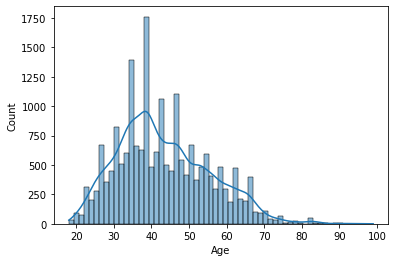

In [10]:
sns.histplot(data=data, x='Age', kde=True)
plt.show()

# **2-The majority of site visitors are more likely to give 5 rates for each product!!**

<AxesSubplot:xlabel='Rating', ylabel='Count'>

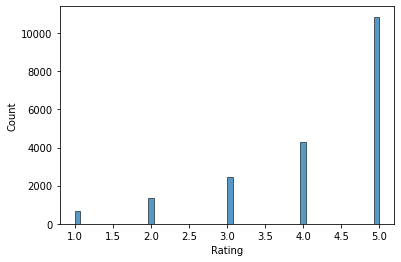

In [11]:
sns.histplot(data=data, x='Rating', kde=False)

# **3-Layering class👗 on the top of whole ratings comparing to other classes!**

<AxesSubplot:xlabel='Rating', ylabel='Class'>

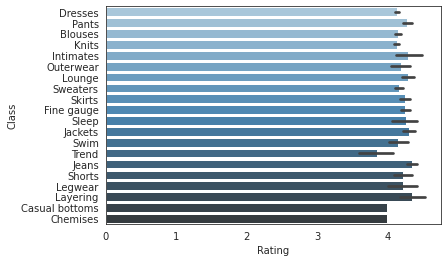

In [12]:
sns.set_style('white')
sns.barplot(x=data['Rating'], y=data['Class'],palette="Blues_d")

# **4- Sweaters are more preferable for those whom are above 40's where Casual bottoms attrcats 20's as this barplot shows below!**

<AxesSubplot:xlabel='Age', ylabel='Class'>

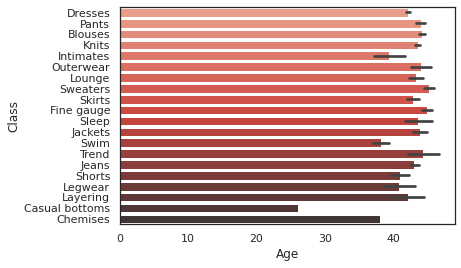

In [13]:
sns.set_theme(style="white")
sns.color_palette("flare", as_cmap=False)
sns.barplot(x=data['Age'], y=data['Class'],palette="Reds_d")

# **Plot shows the ditribution of positive ratings:-**


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


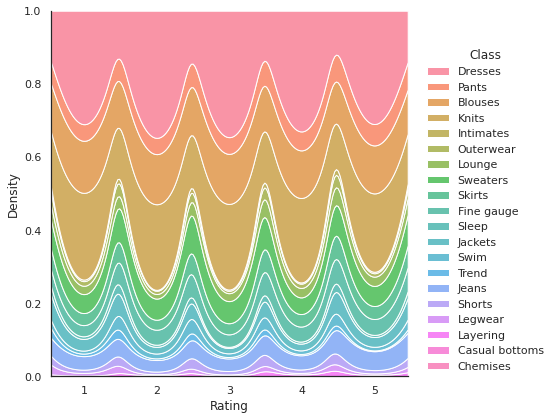

In [14]:
sns.displot(data=data,
           x='Rating', hue="Class",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
)

# **This boxplot below determine the mean age according to each department!!**

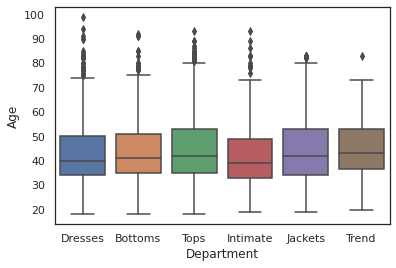

In [15]:
sns.boxplot(x=data['Department'], y=data['Age'])
plt.show()

# **Piechart visualize that the Tops department has gotten the most amounts of ratings, where Trends got the low amount of ratings!**

<AxesSubplot:ylabel='Rating'>

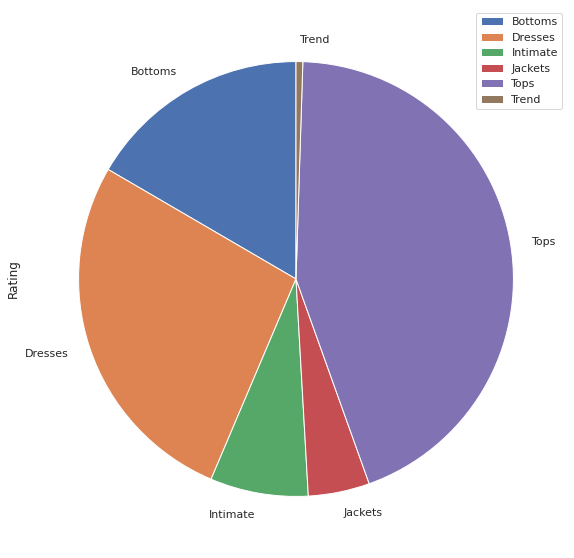

In [16]:
data.groupby(['Department']).sum().plot(kind='pie', subplots=False, shadow = False,startangle=90,figsize=(15,10), y='Rating')

# **Which one is highly Recommended??🌟**

<AxesSubplot:xlabel='count', ylabel='Class'>

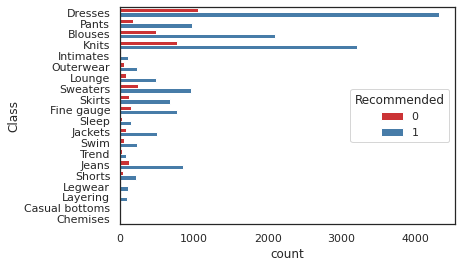

In [17]:
sns.countplot(data=data, y='Class', hue='Recommended',  palette = "Set1")

<AxesSubplot:xlabel='count', ylabel='Department'>

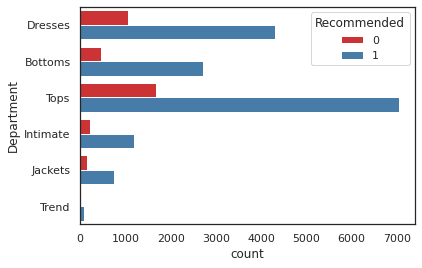

In [18]:
sns.countplot(data=data, y='Department', hue='Recommended' ,palette = "Set1")

<AxesSubplot:xlabel='count', ylabel='Division'>

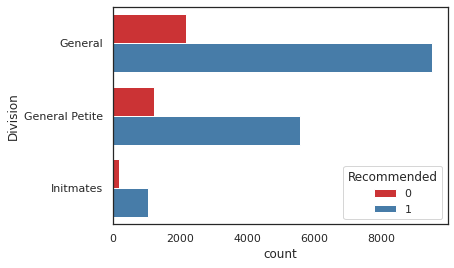

In [19]:
sns.countplot(data=data, y='Division', hue='Recommended', palette = "Set1")

# **Working With Textual Data 📝📝:-**

# **Starting with creating word cloud:**


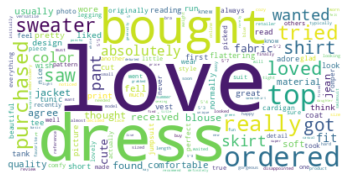

In [20]:
from wordcloud import WordCloud
text = " ".join(cat.split()[1] for cat in data.text)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer

In [22]:
data.columns

Index(['Age', 'Title', 'text', 'Rating', 'Recommended', 'feedback_count',
       'Division', 'Department', 'Class'],
      dtype='object')

In [23]:
data['all_text'] = data['text']

# **Step 1: Tokenization**
Our first step is tokenization. This important task takes your long string of text and converts each word into a “token” or value and places them within a list. The list values are much easier to manipulate by later steps. We’ll create a reusable function to handle this for us.

In [24]:
nltk.download('punkt');

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
def tokenize(column):
    # Tokenize a Pandas dataframe columns and returns a list of tokens.
    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha]

We can now use the Pandas apply() function with lambda to pass in the column containing our string of text, which is called all_text. The tokenize() function we created returns a list, which we’ll assign to a new column called tokenized.

In [26]:
data['tokenized'] = data.apply(lambda x: tokenize(x['all_text']), axis=1)
data[['text', 'tokenized']].head()

,text,tokenized
2,I had such high hopes for this dress and reall...,"[I, had, such, high, hopes, for, this, dress, ..."
3,"I love, love, love this jumpsuit. it's fun, fl...","[I, love, ,, love, ,, love, this, jumpsuit, .,..."
4,This shirt is very flattering to all due to th...,"[This, shirt, is, very, flattering, to, all, d..."
5,"I love tracy reese dresses, but this one is no...","[I, love, tracy, reese, dresses, ,, but, this,..."
6,I aded this in my basket at hte last mintue to...,"[I, aded, this, in, my, basket, at, hte, last,..."


# **Step2: Removing Stopwords:-**

In the next step, we’re going to reduce the noise in our data by removing “stopwords”. These are special language-specific words that appear within a sentence that add little value to the meaning. Removing them helps the model see the words that matter. First, download the stopwords using the below command.

In [27]:
nltk.download('stopwords');

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
def remove_stopwords(tokenized_column):
    # this fuction will retun a list of tokens with English stopwords removed
    stops = set(stopwords.words('english'))
    return [word for word in tokenized_column if not word in stops]

We can then use the same apply() and lambda approach to run the remove_stopwords() function on each row of the dataframe, writing the new list of words to a column called stopwords_removed.

In [29]:
data['stopwords_removed'] = data.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)
data[['text', 'stopwords_removed']].head()

,text,stopwords_removed
2,I had such high hopes for this dress and reall...,"[I, high, hopes, dress, really, wanted, work, ..."
3,"I love, love, love this jumpsuit. it's fun, fl...","[I, love, ,, love, ,, love, jumpsuit, ., 's, f..."
4,This shirt is very flattering to all due to th...,"[This, shirt, flattering, due, adjustable, fro..."
5,"I love tracy reese dresses, but this one is no...","[I, love, tracy, reese, dresses, ,, one, petit..."
6,I aded this in my basket at hte last mintue to...,"[I, aded, basket, hte, last, mintue, see, woul..."


# **Step3: Stemming:-**

The other useful text preprocessing technique we can apply is called “stemming”. This basically reduces each word down to its root, so “processing”, “processor”, and “process”, all become “process”. This is another way to remove noise and reduce the number of unique words in the text to help the model.

In [30]:
def apply_stemming(tokenized_column):
    # this function will return a list of tokens with PorterStemming applied
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in tokenized_column]

In [31]:
data['porter_stemmed'] = data.apply(lambda x: apply_stemming(x['stopwords_removed']), axis=1)
data[['text', 'porter_stemmed']].head()

,text,porter_stemmed
2,I had such high hopes for this dress and reall...,"[I, high, hope, dress, realli, want, work, ., ..."
3,"I love, love, love this jumpsuit. it's fun, fl...","[I, love, ,, love, ,, love, jumpsuit, ., 's, f..."
4,This shirt is very flattering to all due to th...,"[thi, shirt, flatter, due, adjust, front, tie,..."
5,"I love tracy reese dresses, but this one is no...","[I, love, traci, rees, dress, ,, one, petit, ...."
6,I aded this in my basket at hte last mintue to...,"[I, ade, basket, hte, last, mintu, see, would,..."


# **Step4: Rejoin words:**

The final step is to take our last list of tokens and rejoin them back into a string so we can pass it to a vectorizer. This is dead easy. We just pass the tokenized_column (which will be porter_stemmed for us) and use join() to join the words into a string, placing a space between each word.

In [32]:
def rejoin_words(tokenized_column):
    # this fuction will rejoin the tokenized words list into a single string
    return (" ".join(tokenized_column))

In [33]:
data['rejoined'] = data.apply(lambda x: rejoin_words(x['porter_stemmed']), axis=1)
data[['text', 'rejoined']].head()

,text,rejoined
2,I had such high hopes for this dress and reall...,I high hope dress realli want work . initi ord...
3,"I love, love, love this jumpsuit. it's fun, fl...","I love , love , love jumpsuit . 's fun , flirt..."
4,This shirt is very flattering to all due to th...,thi shirt flatter due adjust front tie . perfe...
5,"I love tracy reese dresses, but this one is no...","I love traci rees dress , one petit . 5 feet t..."
6,I aded this in my basket at hte last mintue to...,I ade basket hte last mintu see would look lik...


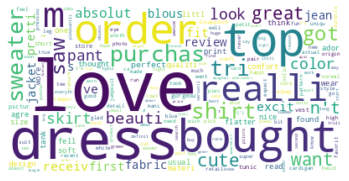

In [34]:
text = " ".join(cat.split()[1] for cat in data.rejoined)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
# spliting the data into trainng and testing data:- 
X_train, X_test, y_train, y_test = train_test_split(data['rejoined'],
                                                   data['Recommended'], test_size=0.3,random_state=0)


In [36]:
print('X_train first entry :\n\n', X_train.iloc[1])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry :

 the shirt beauti , fit much small . stitch limit space shoulder , hem short . petit frame would abl pull off- 5.10 '' medium , shirt n't work everi direct .


X_train shape:  (13763,)


# **CountVectorizer:-**

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
# fit the countVectorizer to the training data:-
vect = CountVectorizer().fit(X_train)

In [38]:
vect.get_feature_names()[::1000]

['00', 'bead', 'cord', 'fave', 'ingest', 'move', 'ps', 'smash', 'twee']

In [39]:
len(vect.get_feature_names())

8740

In [40]:
# Transform the document in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

<13763x8740 sparse matrix of type '<class 'numpy.int64'>'
	with 373231 stored elements in Compressed Sparse Row format>

# **Create Support vector machine classifier(linear kernal):**

In [41]:

from sklearn import svm
clf = svm.SVC(kernel='linear')
# train the classifier: 
clf.fit(X_train_vectorized, y_train)

SVC(kernel='linear')

# **Evaluate the model:-**

In [42]:
from sklearn.metrics import accuracy_score, classification_report, f1_score
# predict the transformed test documents: =
predictions = clf.predict(vect.transform(X_test))
print(classification_report(y_test, predictions))
print('Accuracy score: ', round(accuracy_score(y_test, predictions,2)))
print('F1_score: ', round(f1_score(y_test, predictions,2)))

              precision    recall  f1-score   support

           0       0.64      0.61      0.62      1072
           1       0.91      0.92      0.92      4827

    accuracy                           0.87      5899
   macro avg       0.78      0.77      0.77      5899
weighted avg       0.86      0.87      0.86      5899

Accuracy score:  1
F1_score:  1


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass normalize=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


# **Tfidf:-**

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer(min_df = 5).fit(X_train)
len(vect.get_feature_names())

3071

In [44]:
X_train_vectorized = vect.transform(X_train)
model = svm.SVC(kernel='linear')
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
print('accuracy :', accuracy_score(y_test, predictions))

accuracy : 0.8887947109679607
